# CTA200 Assignment 3
Andrew Li | 1006675625

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib

from functions import complex_iterate

font = {'size'   : 16}

matplotlib.rc('font', **font)

## Question 1

In [3]:
image = complex_iterate(100)

In [4]:
image = np.array(image) + 1

[Text(0.5, 0, 'Real'), Text(0, 0.5, 'Imaginary')]

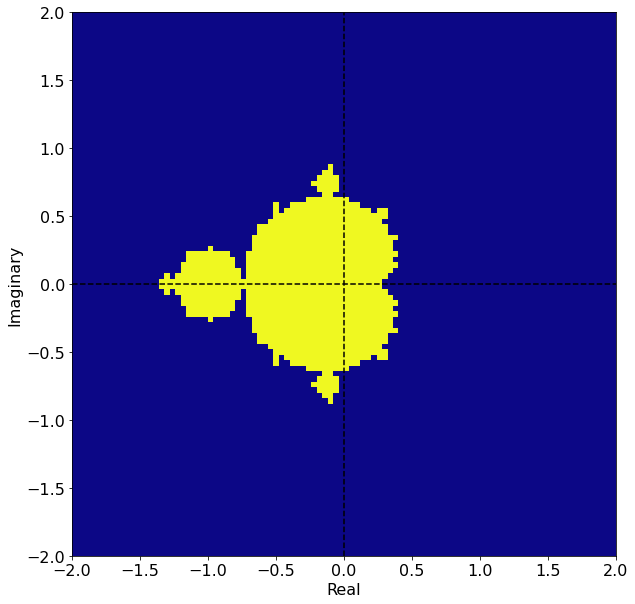

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(np.isnan(image),cmap='plasma',extent=[-2,2,-2,2],origin='lower')
ax.axhline(0,color='k',ls='--')
ax.axvline(0,color='k',ls='--')
ax.set(xlabel='Real',ylabel='Imaginary')

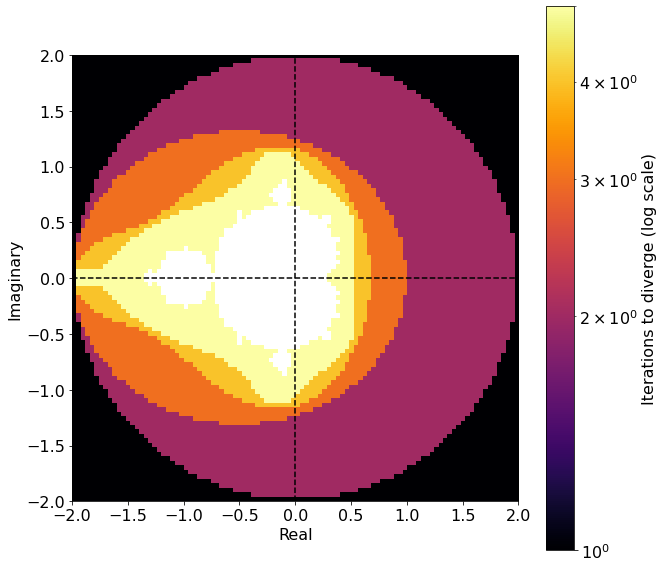

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(image,cmap='inferno',extent=[-2,2,-2,2],origin='lower',norm=LogNorm(vmin=1,vmax=5))
ax.axhline(0,color='k',ls='--')
ax.axvline(0,color='k',ls='--')
ax.set(xlabel='Real',ylabel='Imaginary')
fig.colorbar(im,label='Iterations to diverge (log scale)')

## Question 2

In [7]:
sigma, r, b = 10, 28, 8/3

W_0 = [0,1,0]

def dW(t,W):
    dX = -sigma*(W[0]-W[1])
    dY = r*W[0] - W[1] - W[0]*W[2]
    dZ = -b*W[2] + W[0]*W[1]
    return [dX,dY,dZ]

In [8]:
from scipy.integrate import solve_ivp

In [9]:
sol = solve_ivp(dW,[0,60],W_0,dense_output=True)

Text(0.5, 0, 'Iterations')

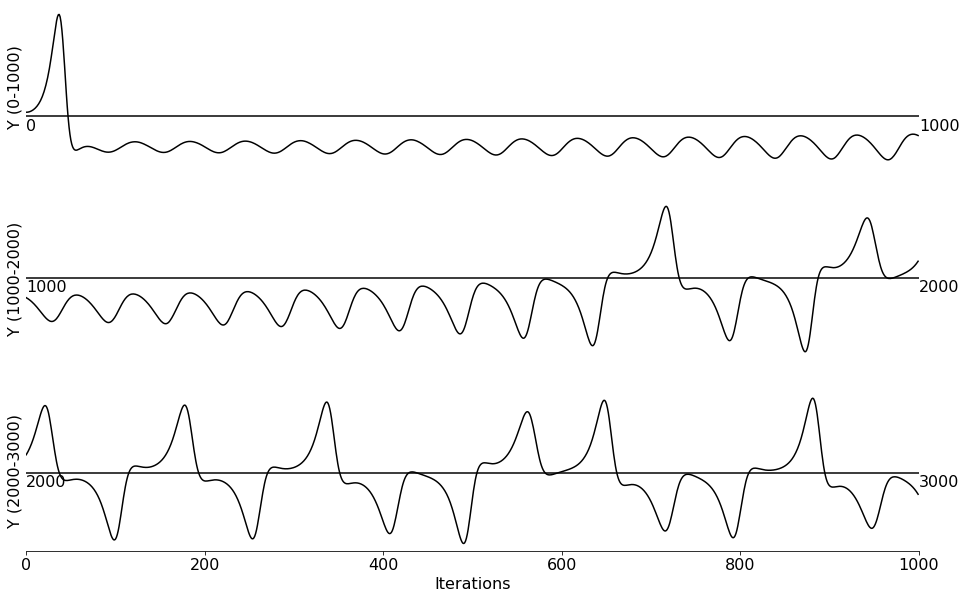

In [10]:
fig, ax = plt.subplots(3,1,figsize=(16,10),sharex=True)

t = np.arange(0,10,0.01)
t1 = np.arange(0,1000)
W11 = sol.sol(t)
W12 = sol.sol(t+10)
W13 = sol.sol(t+20)



ax[0].axhline(0,color='k')
ax[1].axhline(0,color='k')
ax[2].axhline(0,color='k')

ax[0].plot(t1,W11.T[:,1],color='k')
ax[1].plot(t1,W12.T[:,1],color='k')
ax[2].plot(t1,W13.T[:,1],color='k')


ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])

ax[0].spines[['left','right','top','bottom']].set_visible(False)
ax[1].spines[['left','right','top','bottom']].set_visible(False)
ax[2].spines[['left','right','top']].set_visible(False)

ax[2].set_xlim(0,1000)

ax[0].annotate('0',(0,-4))
ax[1].annotate('1000',(0,-4))
ax[2].annotate('2000',(0,-4))
ax[0].annotate('1000',(1000,-4))
ax[1].annotate('2000',(1000,-4))
ax[2].annotate('3000',(1000,-4))

ax[0].set_ylabel('Y (0-1000)')
ax[1].set_ylabel('Y (1000-2000)')
ax[2].set_ylabel('Y (2000-3000)')
ax[2].set_xlabel('Iterations')

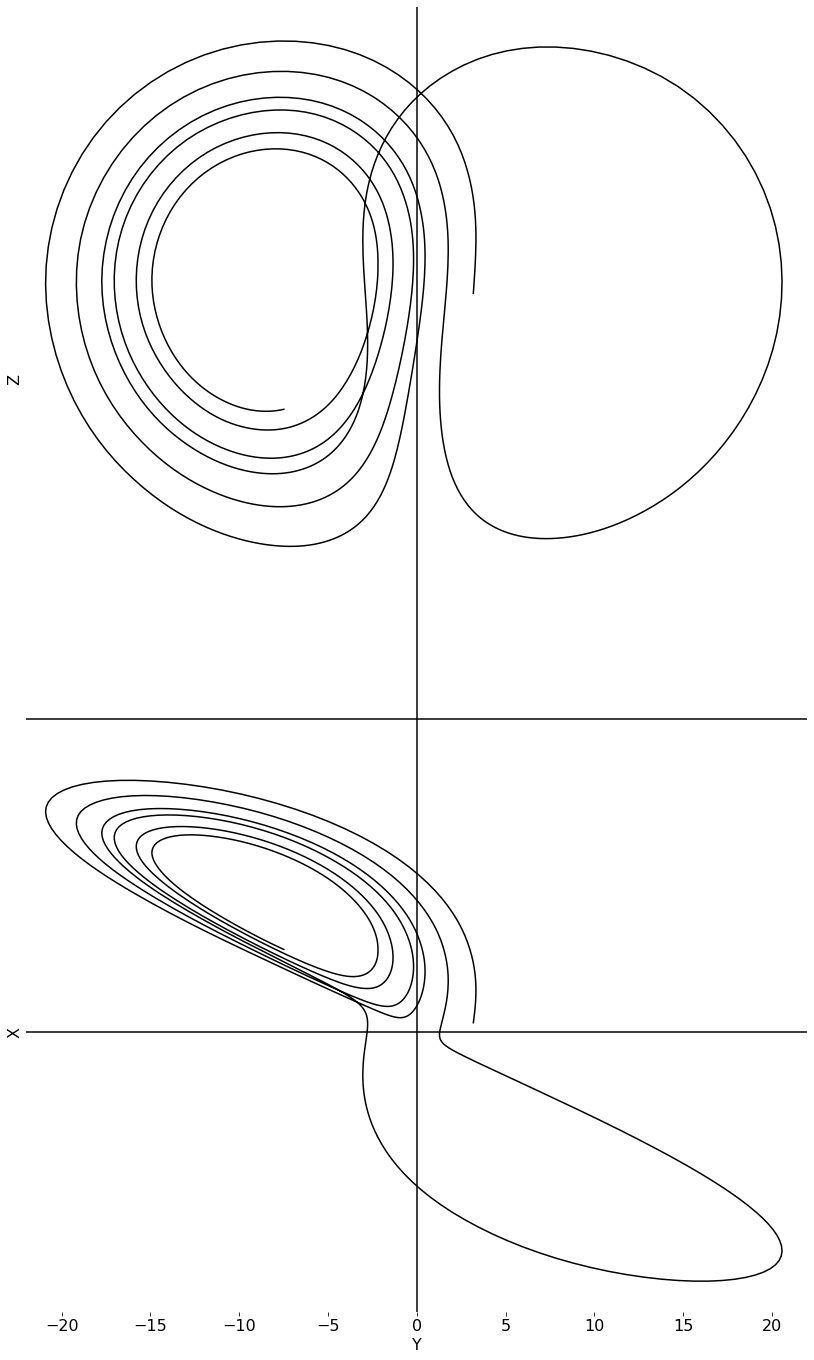

In [12]:
fig, ax = plt.subplots(2,1,figsize=(14,24),sharex=True,gridspec_kw={'height_ratios': [2,1.5]})

t = np.linspace(14,19,1000)
W2 = sol.sol(t)

ax[0].plot(W2.T[:,1],W2.T[:,2],color='k')
ax[1].plot(W2.T[:,1],W2.T[:,0],color='k')



ax[0].axhline(0,color='k')
ax[1].axhline(0,color='k')
ax[0].axvline(0,color='k')
ax[1].axvline(0,color='k')

ax[0].get_xaxis().set_visible(False)
ax[0].set(yticks=[],ylabel='Z')
ax[1].set(yticks=[],xlabel='Y',ylabel='X',xlim=(-22,22),ylim=(18,-18))

ax[0].spines[['left','right','top','bottom']].set_visible(False)
ax[1].spines[['left','right','top','bottom']].set_visible(False)

plt.subplots_adjust(hspace=0)

In [13]:
sol2 = solve_ivp(dW,[0,60],[0,1.00000001,0],dense_output=True)

In [35]:
t3 = np.arange(0,60,0.01)
W3 = sol.sol(t3).T
W3p = sol2.sol(t3).T

dist = [np.linalg.norm(i) for i in (W3-W3p)]

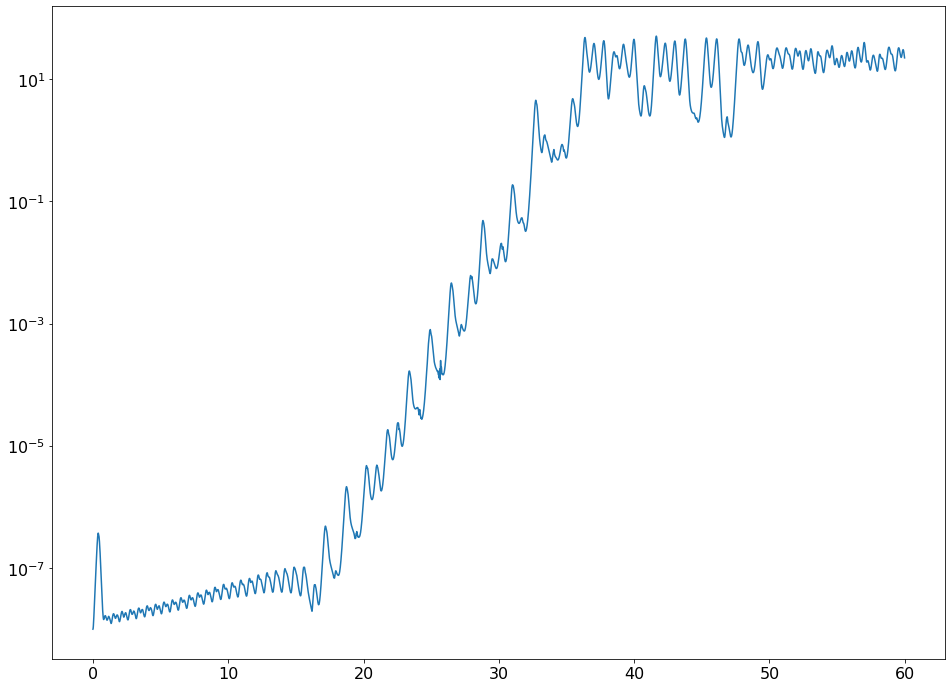

In [36]:
plt.figure(figsize=(16,12))

plt.yscale('log')
plt.plot(t3,dist)